# Subsample 
- In den Unternehmen werden nur wenige Schweißungen zur Einstellung der Maschinenparameter durchgeführt.
- Aufgrund der geringen Größe der Datenmenge wurden keine neuronalen Netze getestet, sondern lediglich Baumverfahren und KNN
## Ergebnis:
- Die Klassifizierung funktioniert auch bei kleinen Datensätzen sehr gut.
- Die Regression funktioniert bei kleinen Stichproben nicht so gut wie bei größeren Datensätzen.

In [1]:
from help_functions import loadAggData_subsample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import joblib

# Bester RandomForestRegressor für ["P_std", "F_max", "T_sum"]:
Beste Parameter: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

Stichprobengröße: 50


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.928 | 230.339 | 314.084 | 6.76 |
+-------+---------+---------+------+


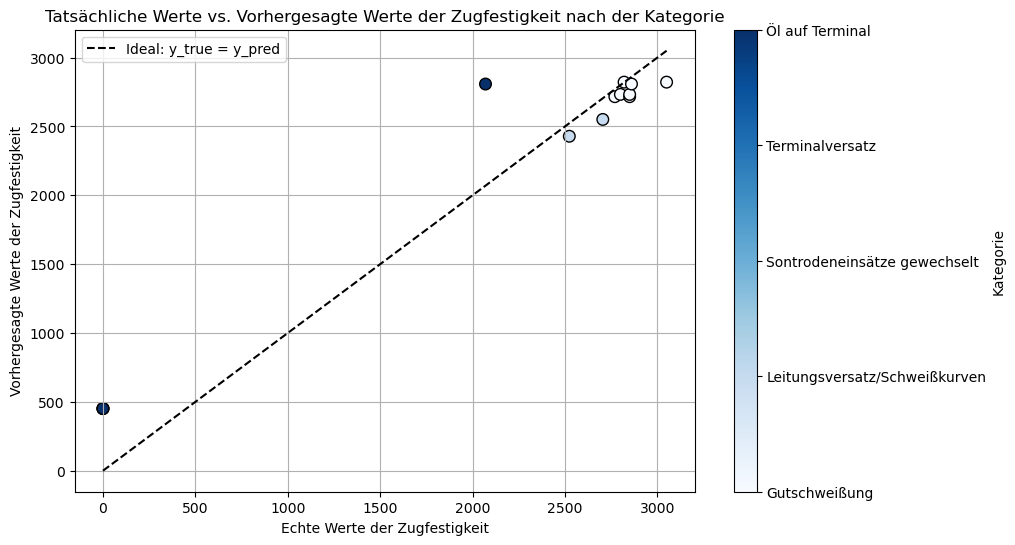

Stichprobengröße: 60


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.901 | 166.952 | 304.031 | 6.13 |
+-------+---------+---------+------+


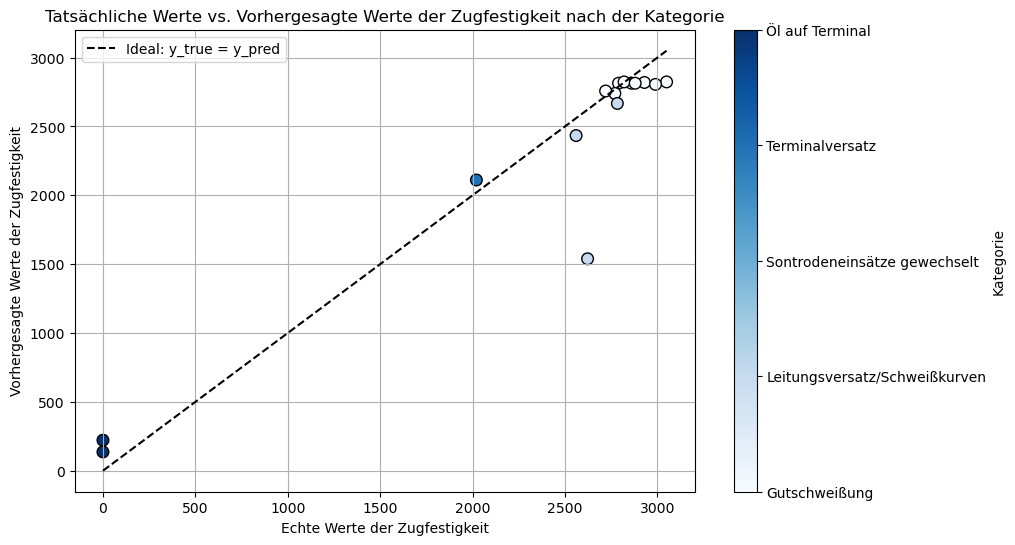

Stichprobengröße: 70


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.929 | 180.752 | 302.745 | 7.39 |
+-------+---------+---------+------+


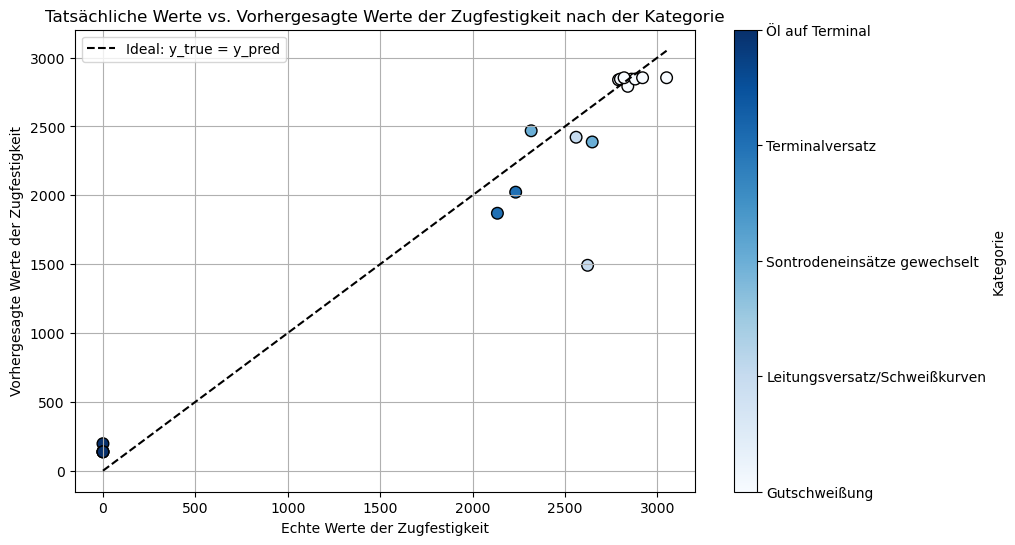

Stichprobengröße: 80


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.914 | 205.089 | 322.126 | 8.27 |
+-------+---------+---------+------+


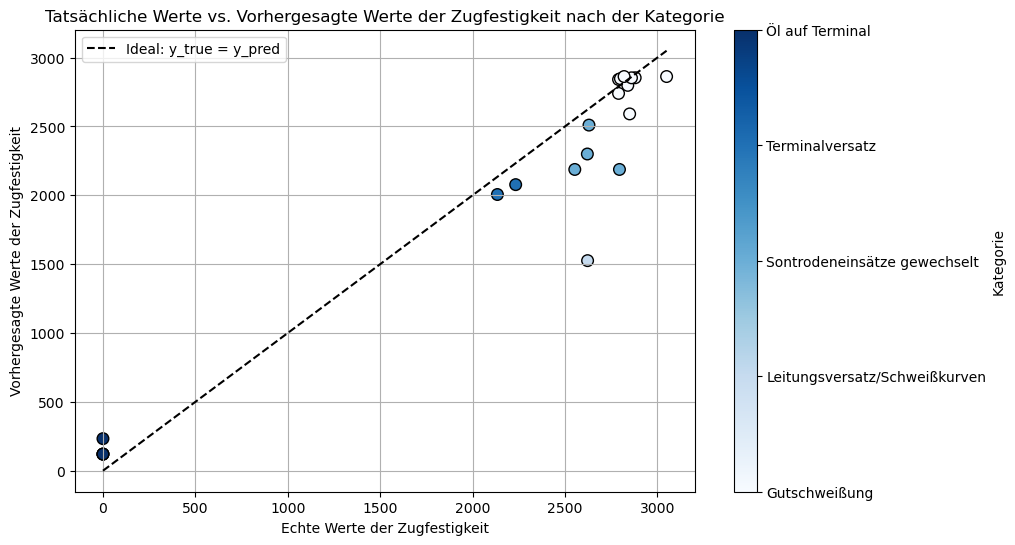

Stichprobengröße: 90


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.893 | 166.836 | 257.106 | 5.99 |
+-------+---------+---------+------+


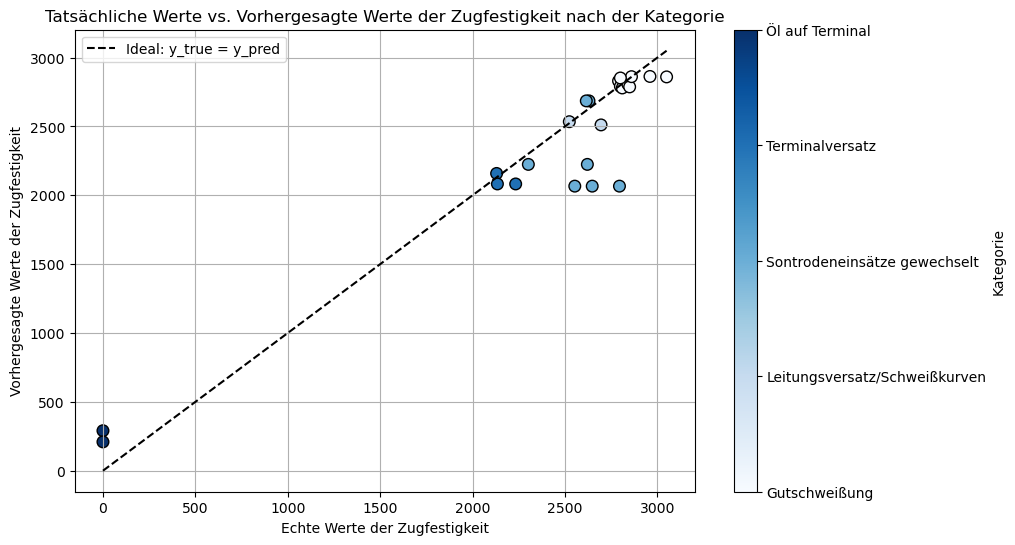

Stichprobengröße: 100


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.945 | 157.38 | 221.646 | 7.31 |
+-------+--------+---------+------+


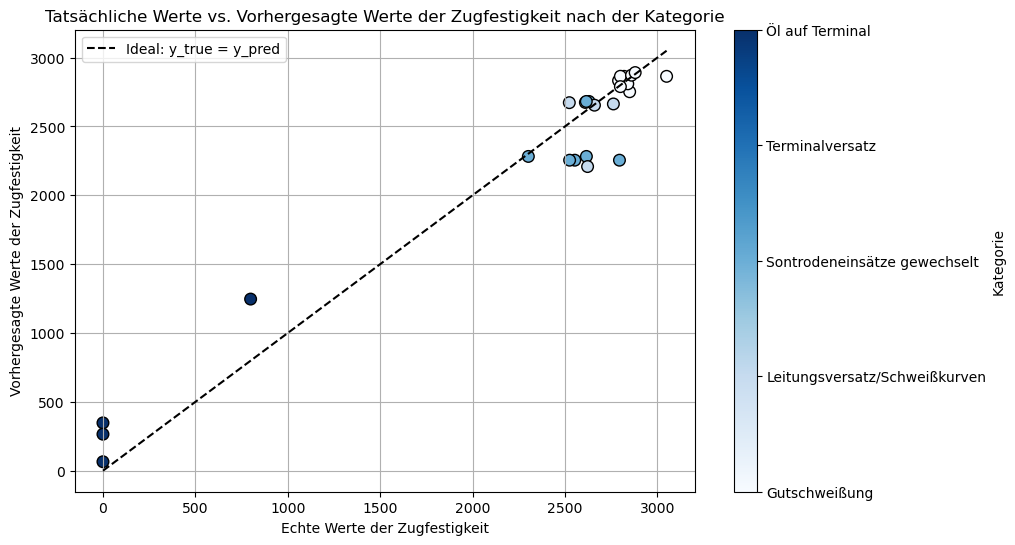

Stichprobengröße: 200


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.981 | 96.989 | 139.143 | 4.49 |
+-------+--------+---------+------+


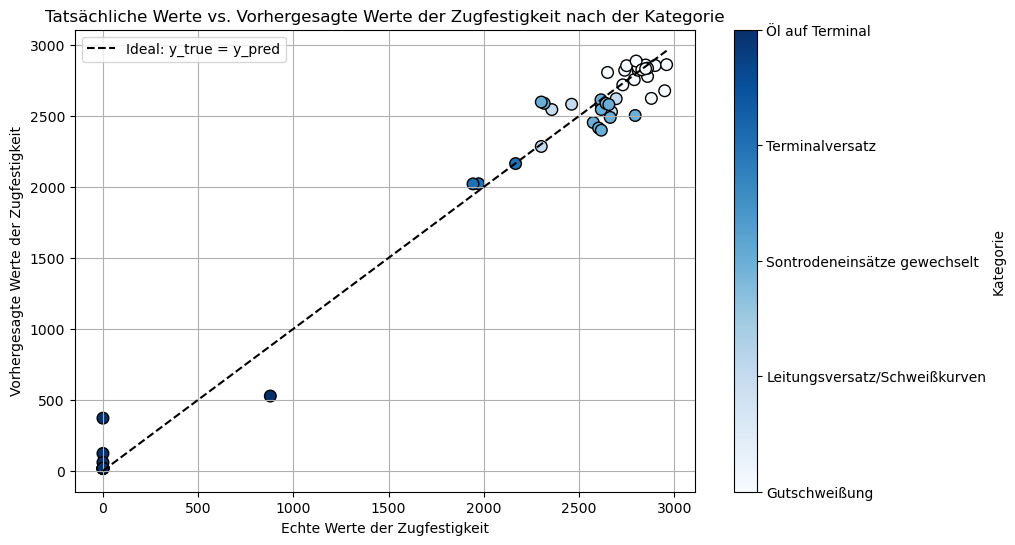

Stichprobengröße: 300


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.967 | 110.423 | 175.865 | 7.31 |
+-------+---------+---------+------+


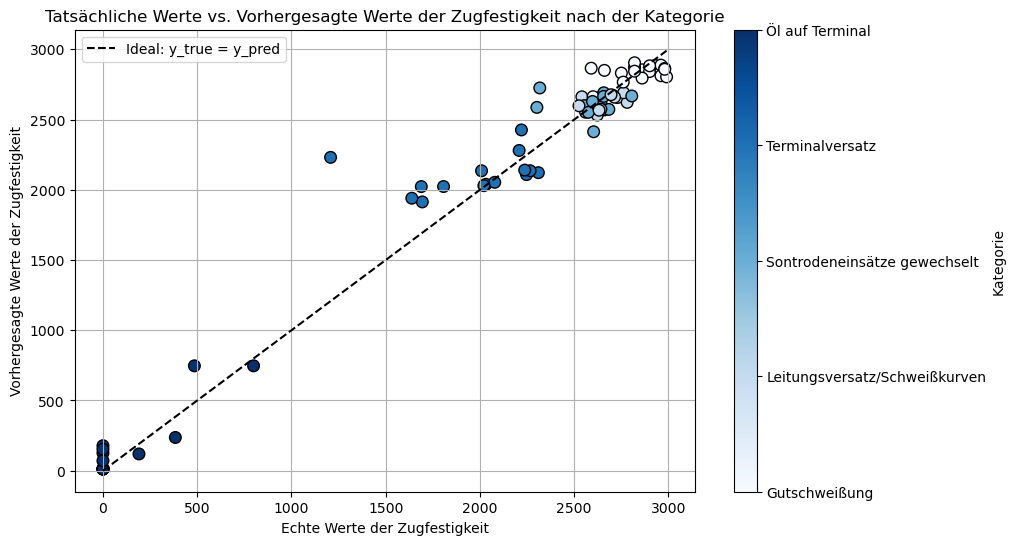

Stichprobengröße: 500


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.972 | 114.383 | 161.611 | 8.57 |
+-------+---------+---------+------+


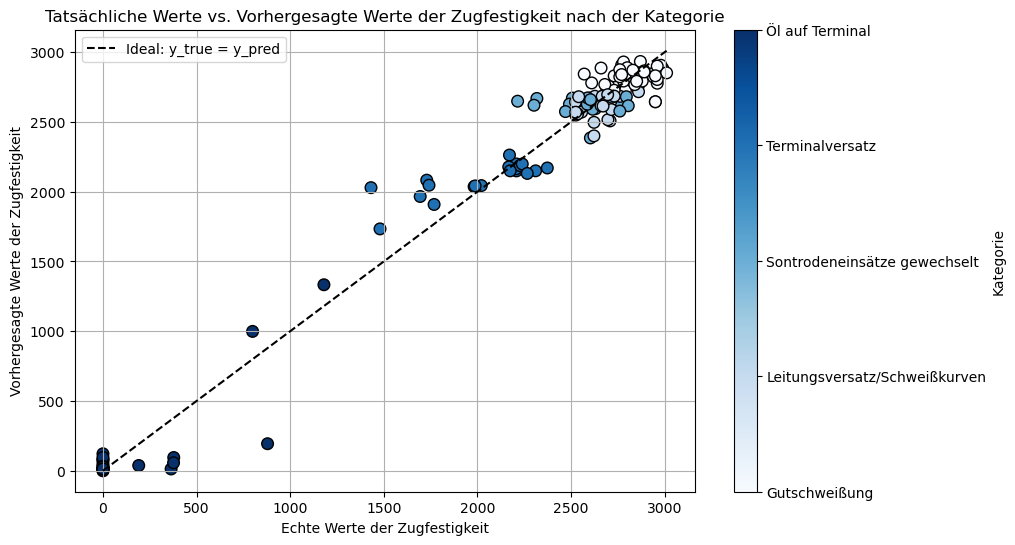

Stichprobengröße: 600


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.979 | 89.261 | 145.522 | 5.6  |
+-------+--------+---------+------+


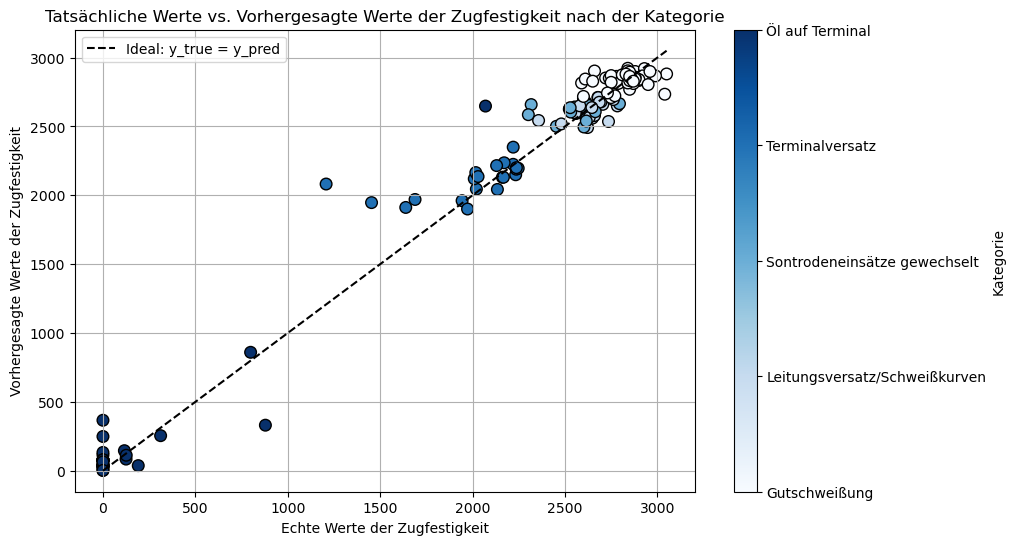

In [2]:
loader = loadAggData_subsample()
filter_c = ["P_std", "F_max", "T_sum"]

sample_size = [50, 60, 70, 80, 90, 100, 200, 300, 500, None]

for i in sample_size:
    x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
        filter_columns=filter_c, normalize=False, sample_size=i
    )

    rf = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        min_samples_split=15,
        min_samples_leaf=1,
        max_features="sqrt",
        bootstrap=False,
    )

    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)
    print(f"Stichprobengröße: {600 if i is None else i}")
    loader.regression_statistics(y_test, y_pred, rescale=False)
    loader.plot_regression_results(y_test, y_pred, rescale=False)

In der praktischen Anwendung ist die Zuverlässigkeit der Modelle bei kleinen Stichproben fraglich. Die Unternehmen verfügen beim "Einschweißen" in der Regel über kleine Stichproben. Aus dem Gespräch mit Andreas ergab sich, dass die Stichprobengröße in etwa bei 60–80 liegt. Das optimale Modell für die drei gewählten Spalten zeigt erst wieder eine verbesserte Leistung, wenn die  $Stichprobe \geq 200$ ist.

# KNeighborsRegressor für ["P_std", "F_max", "T_sum"]
Beste Parameter: {'weights': 'uniform', 'p': 2, 'n_neighbors': 8, 'metric': 'minkowski'}

Stichprobengröße: 50


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.922 | 226.775 | 327.593 | 6.27 |
+-------+---------+---------+------+


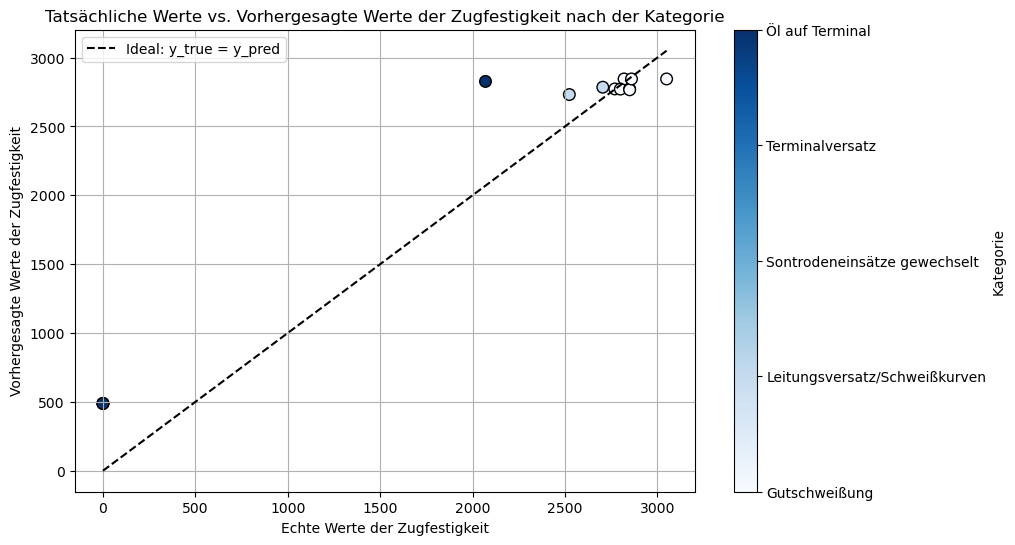

Stichprobengröße: 60


+-------+-------+---------+------+
|   R²  |  MAE  |   RSME  | MAPE |
+-------+-------+---------+------+
| 0.984 | 90.65 | 120.376 | 3.59 |
+-------+-------+---------+------+


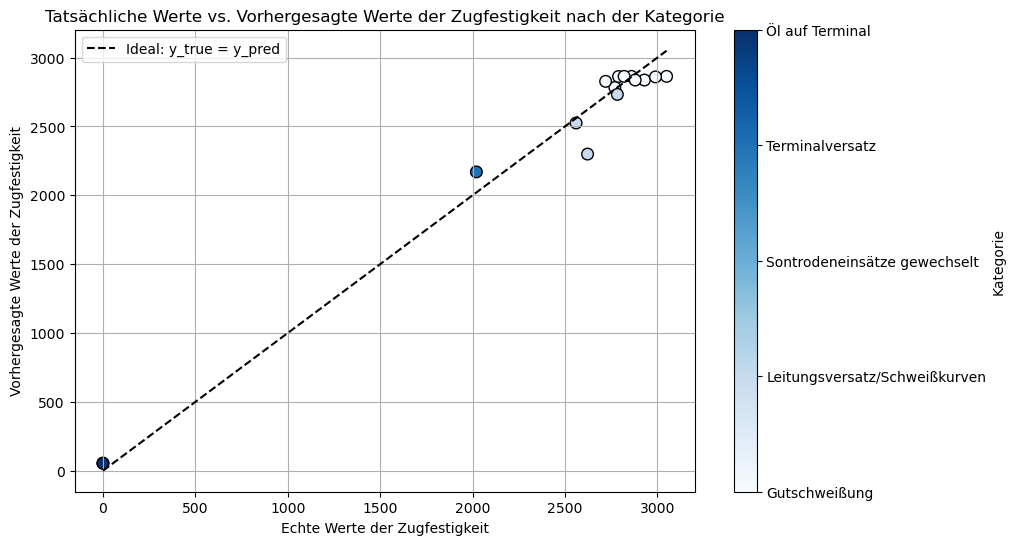

Stichprobengröße: 70


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.986 | 94.141 | 132.599 | 3.93 |
+-------+--------+---------+------+


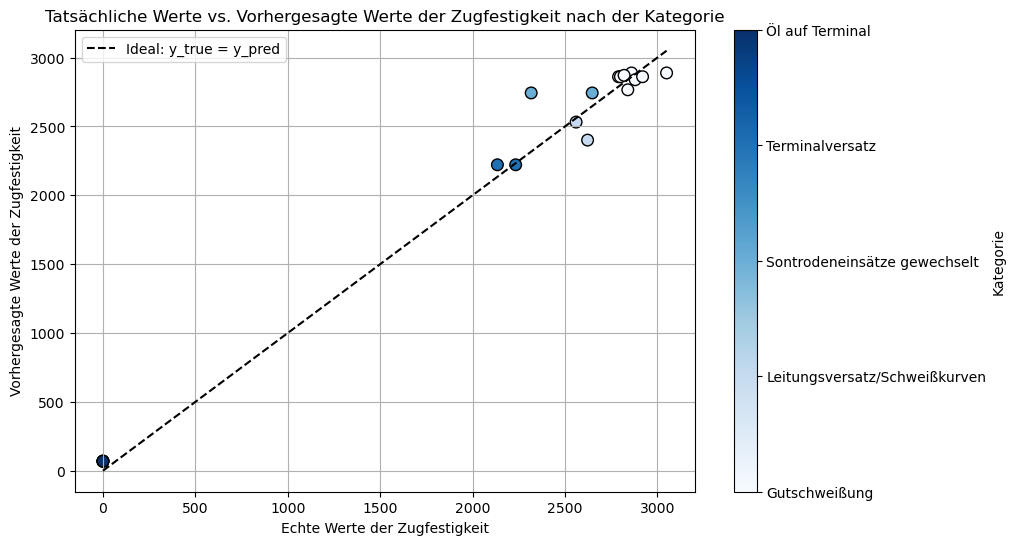

Stichprobengröße: 80


+-------+--------+--------+------+
|   R²  |  MAE   |  RSME  | MAPE |
+-------+--------+--------+------+
| 0.993 | 73.583 | 91.709 | 3.03 |
+-------+--------+--------+------+


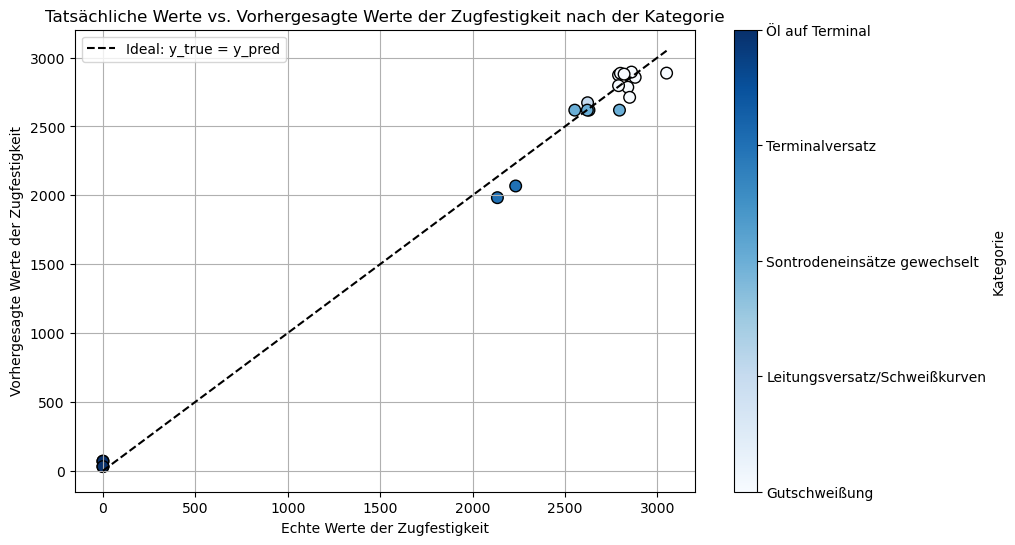

Stichprobengröße: 90


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.973 | 102.639 | 128.978 | 4.04 |
+-------+---------+---------+------+


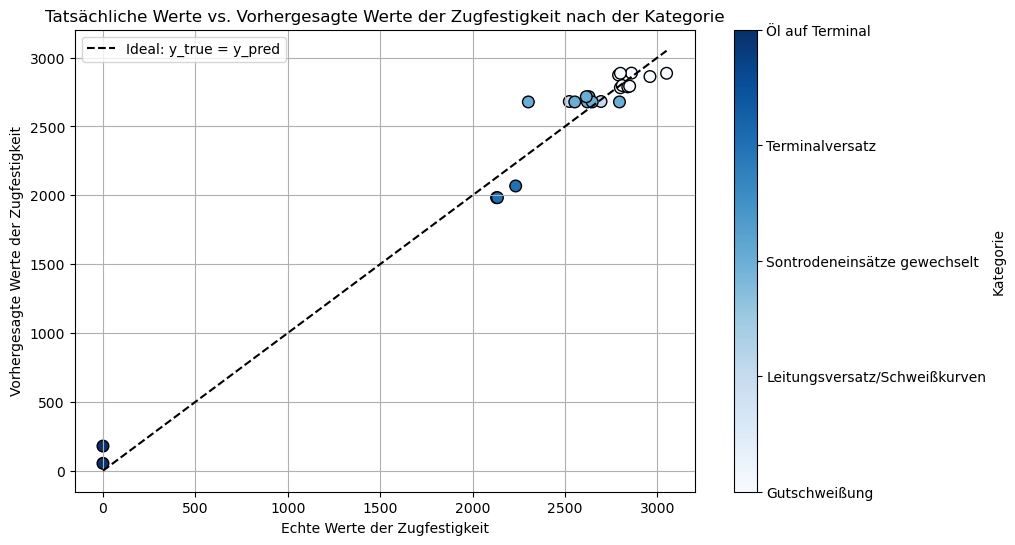

Stichprobengröße: 100


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.967 | 114.897 | 169.904 | 6.99 |
+-------+---------+---------+------+


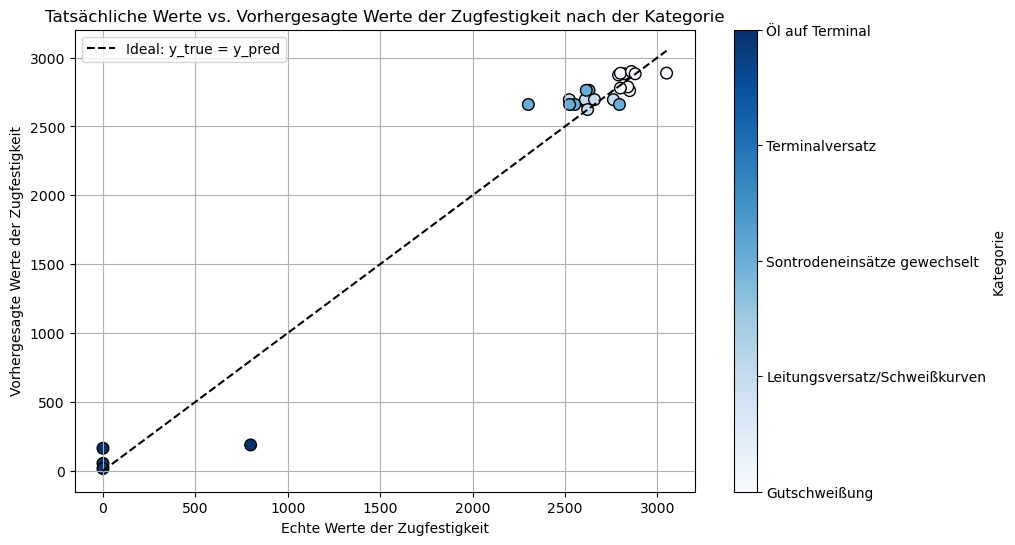

Stichprobengröße: 200


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.977 | 88.711 | 154.214 | 5.29 |
+-------+--------+---------+------+


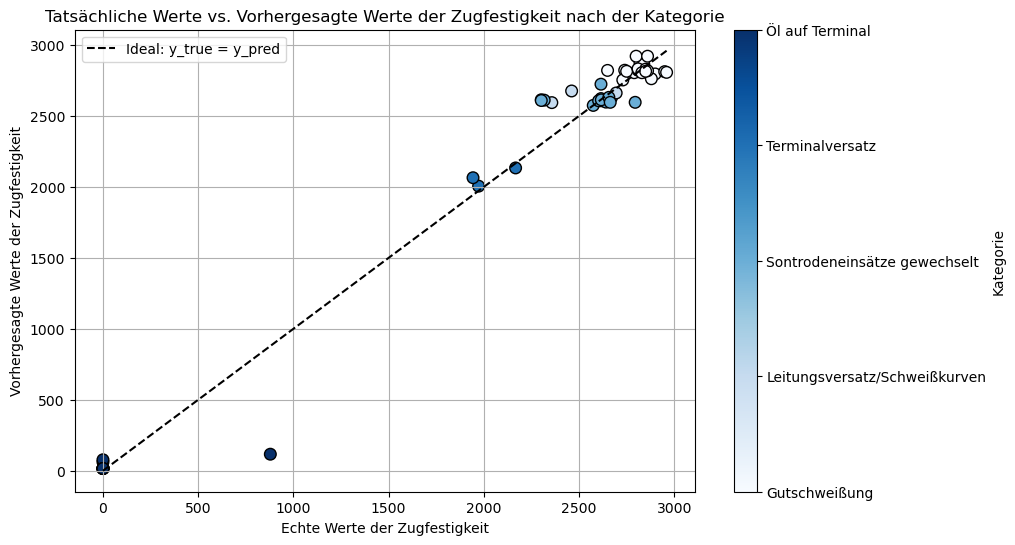

Stichprobengröße: 300


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.971 | 107.56 | 165.163 | 8.14 |
+-------+--------+---------+------+


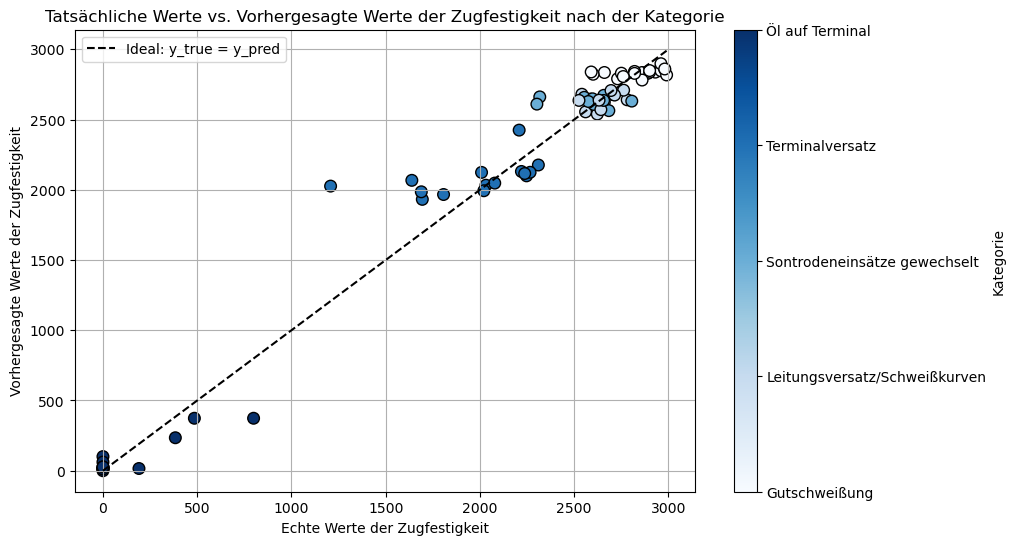

Stichprobengröße: 500


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.975 | 107.14 | 155.048 | 8.32 |
+-------+--------+---------+------+


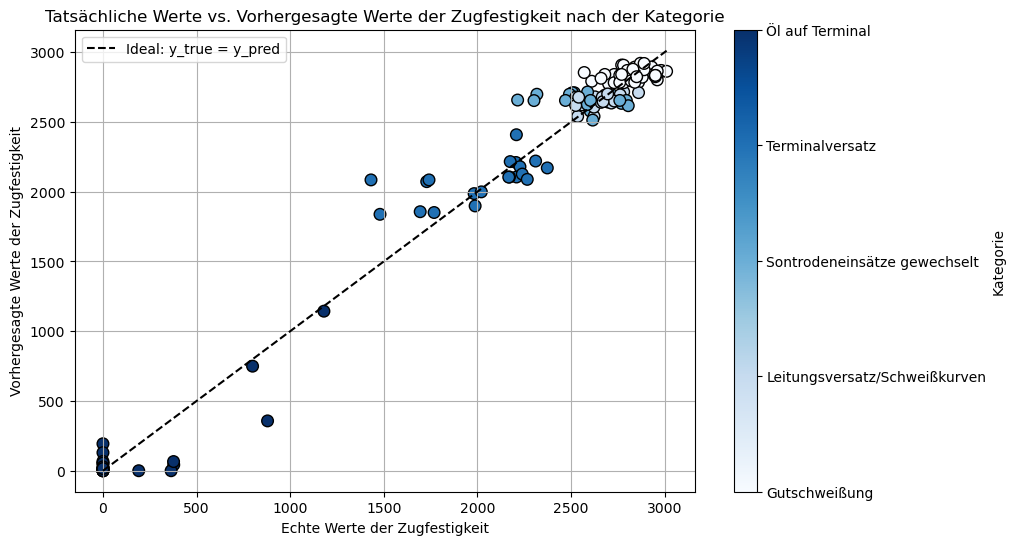

Stichprobengröße: 600


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.981 | 92.192 | 139.715 | 6.74 |
+-------+--------+---------+------+


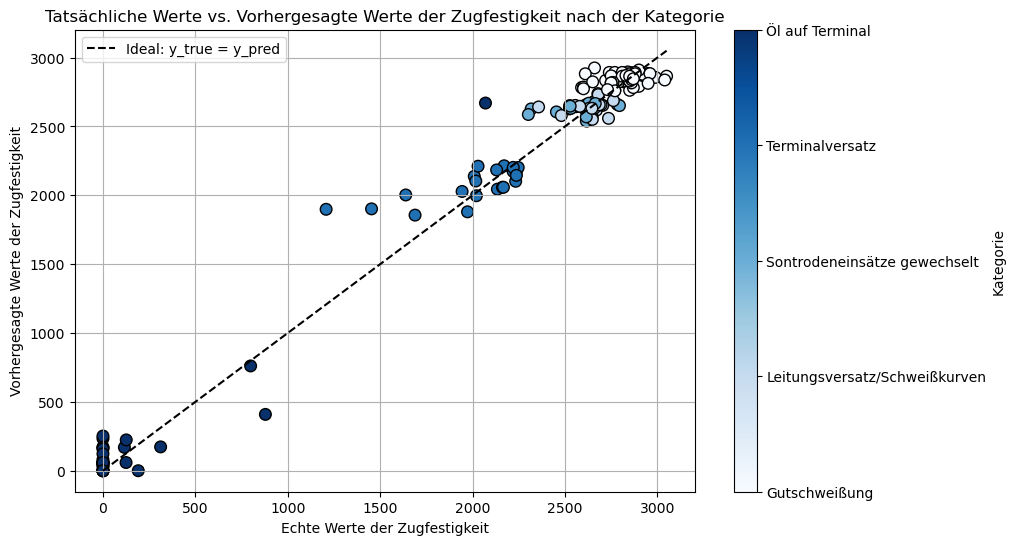

In [3]:
loader = loadAggData_subsample()
filter_c = ["P_std", "F_max", "T_sum"]

sample_size = [50, 60, 70, 80, 90, 100, 200, 300, 500, None]

for i in sample_size:
    x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(
        filter_columns=filter_c, normalize=True, sample_size=i
    )

    knr = KNeighborsRegressor(weights="uniform", p=2, n_neighbors=8, metric="minkowski")

    knr.fit(x_train, y_train)

    y_pred = knr.predict(x_test)
    print(f"Stichprobengröße: {600 if i is None else i}")
    loader.regression_statistics(y_test, y_pred, rescale=True)
    loader.plot_regression_results(y_test, y_pred, rescale=True)

# KNeighborsClassifier für ["P_std", "F_max", "T_sum"]
Beste Parameter: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         2

    accuracy                           0.92        13
   macro avg       0.90      0.95      0.90        13
weighted avg       0.96      0.92      0.93        13





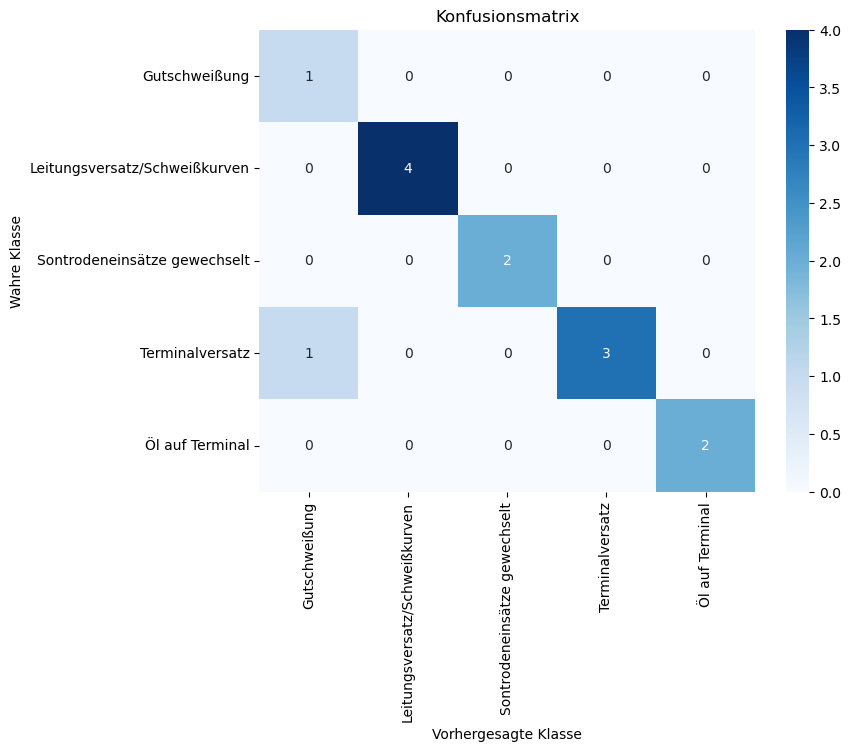

Stichprobengröße: 50
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         4

    accuracy                           0.96        25
   macro avg       0.97      0.96      0.96        25
weighted avg       0.97      0.96      0.96        25





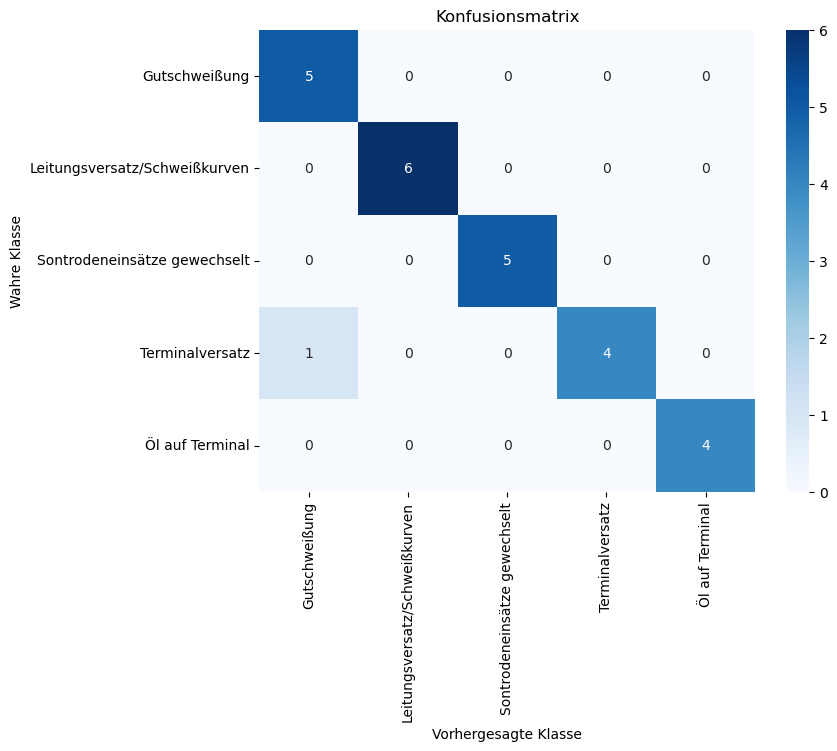

Stichprobengröße: 100
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        13
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.97        50
weighted avg       0.98      0.98      0.98        50





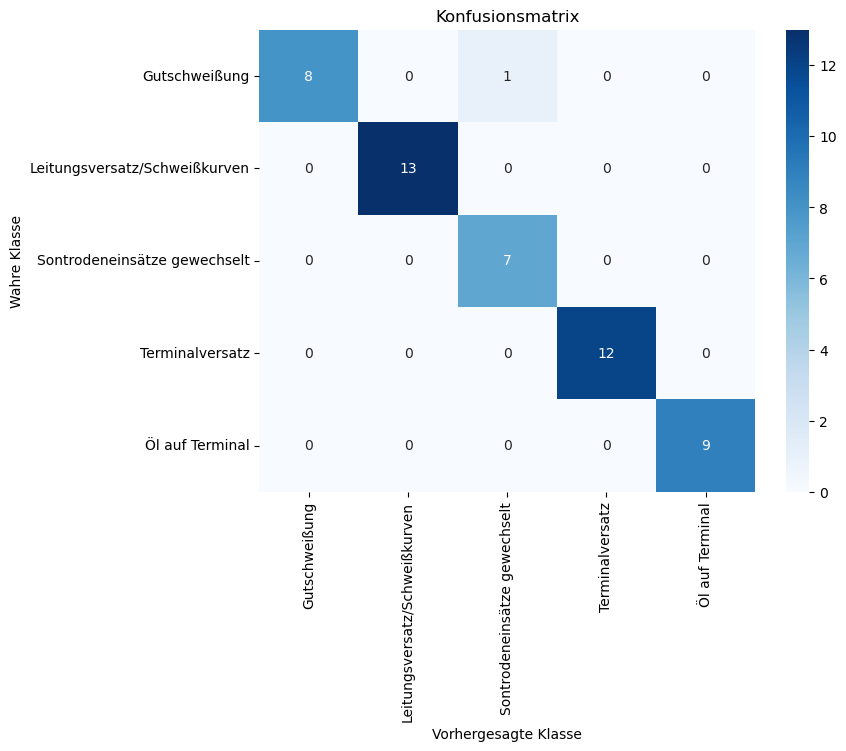

Stichprobengröße: 200
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        10

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75





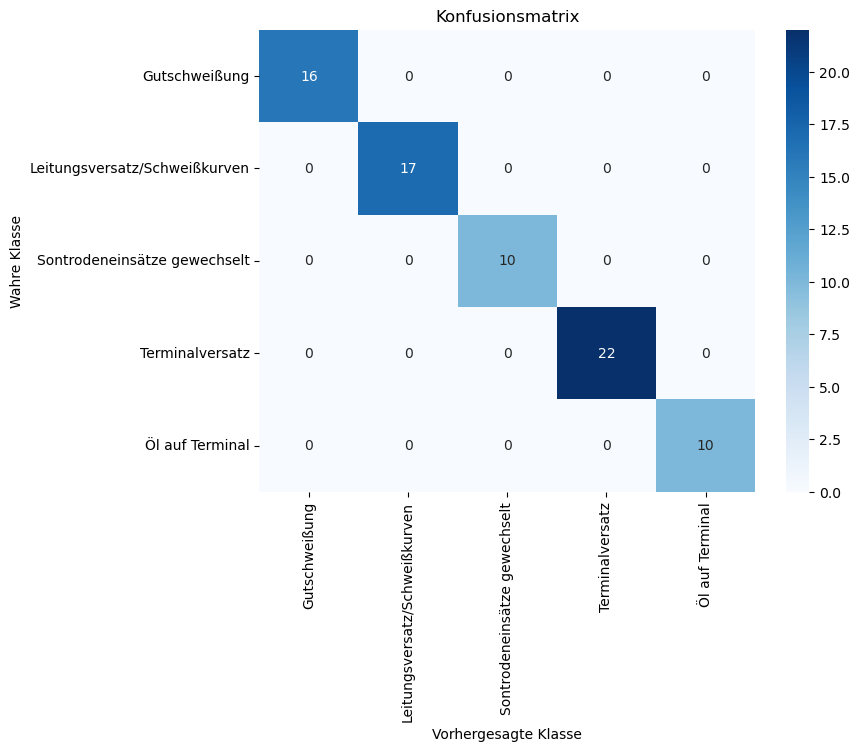

Stichprobengröße: 300
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        21

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100





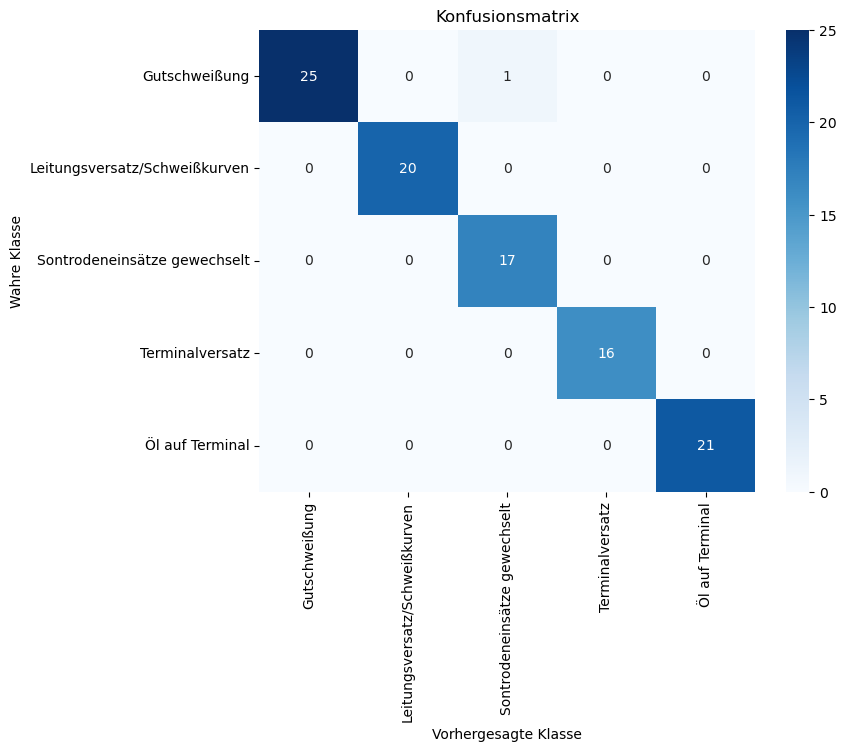

Stichprobengröße: 400
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





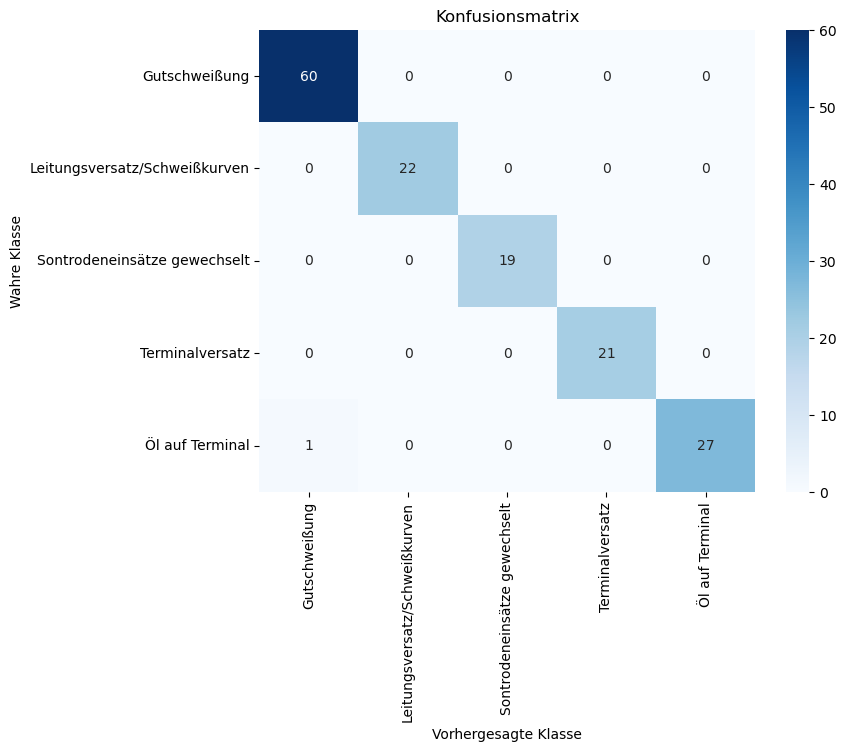

Stichprobengröße: 600


In [4]:
helper = loadAggData_subsample()
filter_c = ["P_std", "F_max", "T_sum"]
sample_size = [10, 20, 40, 60, 80, None]

for i in sample_size:

    x_train, x_test, y_train, y_test = helper.load_and_split_classification_data(
        filter_columns=filter_c, normalize=True, sample_size=i
    )
    knn = KNeighborsClassifier(metric="euclidean", n_neighbors=9, weights="uniform")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    helper.confusionmatrix(y_test, y_pred)
    print(f"Stichprobengröße: {600 if i is None else i*5}")

# RandomForestClassifier für ["P_std", "F_max", "T_sum"]:
Beste Parameter: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Stichprobengröße: 50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13





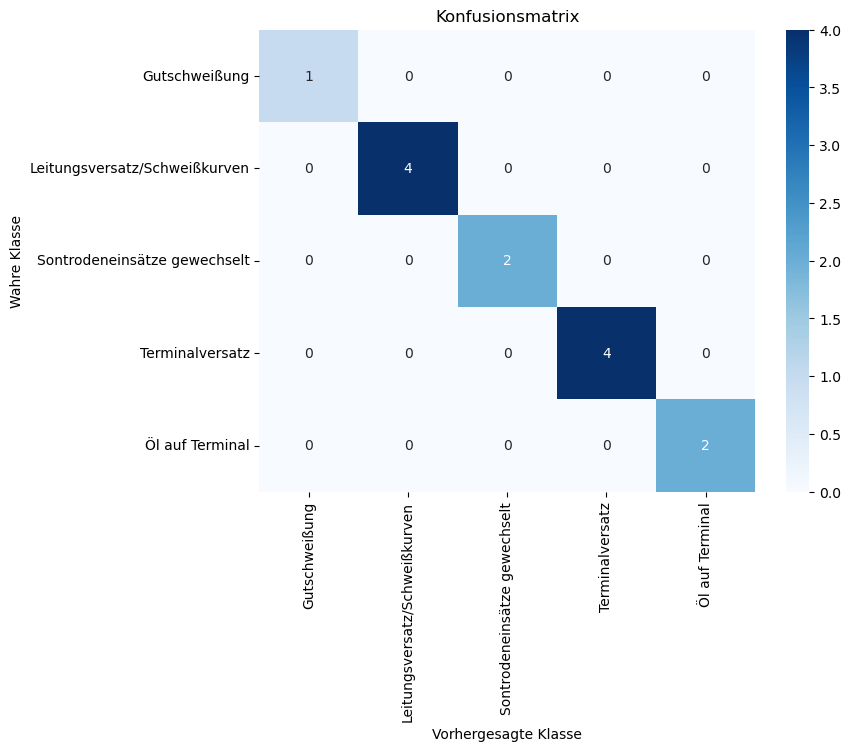

Stichprobengröße: 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25





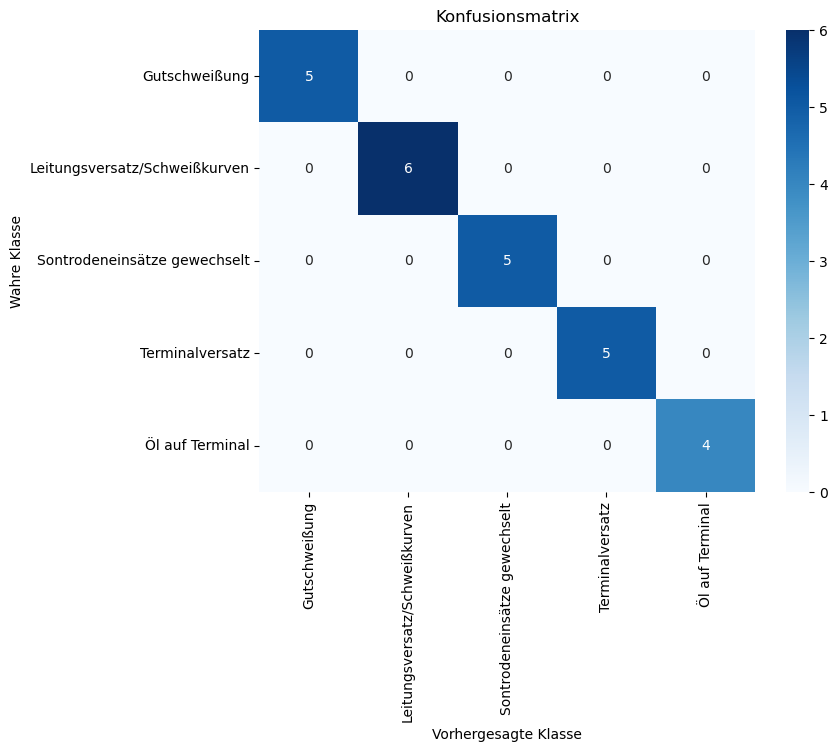

Stichprobengröße: 200
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00        13
           2       0.78      1.00      0.88         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50





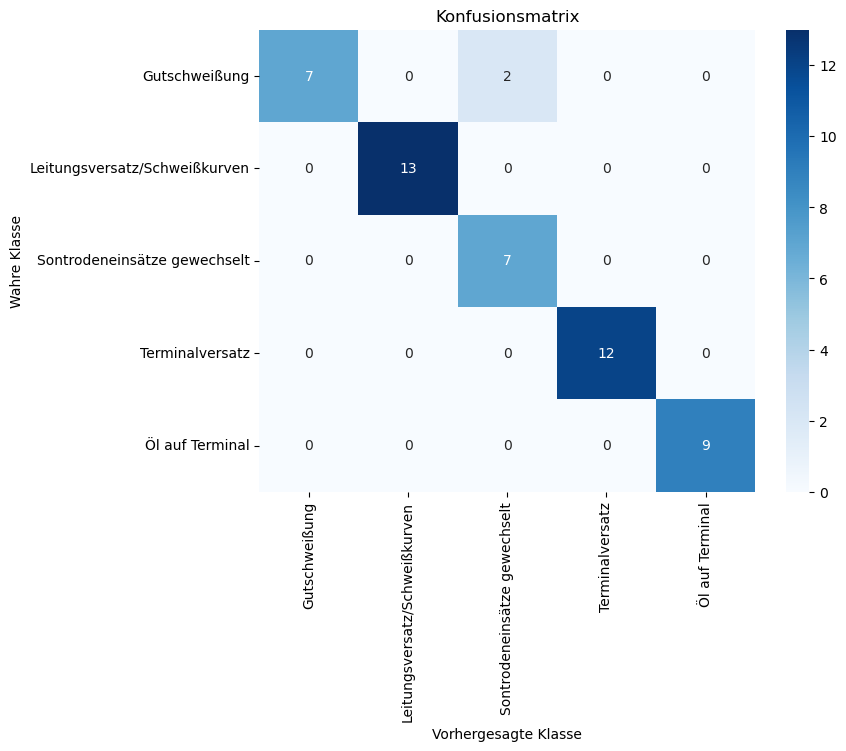

Stichprobengröße: 300
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        10

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75





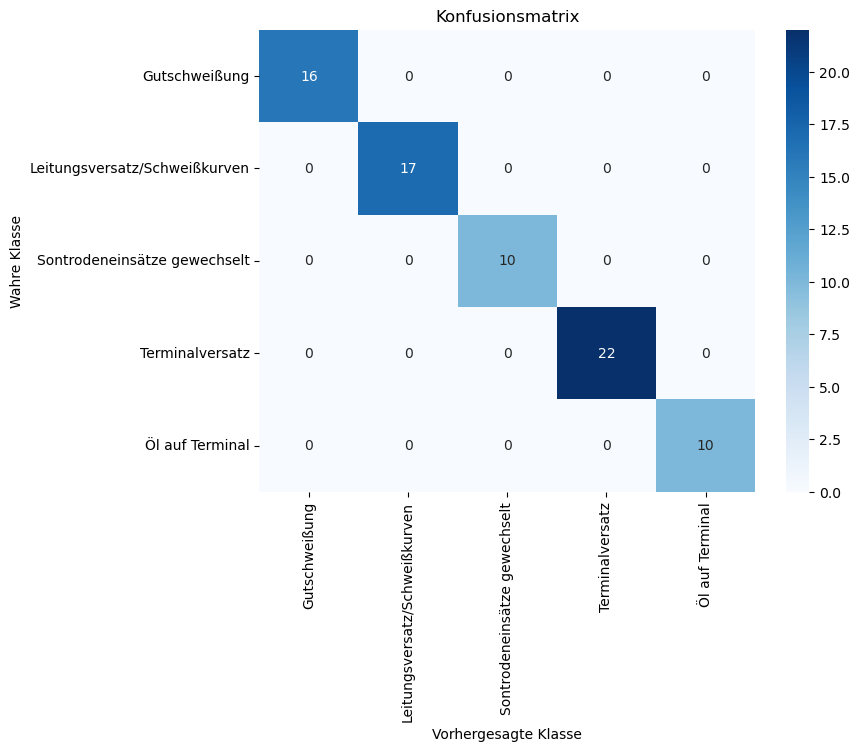

Stichprobengröße: 400
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        21

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100





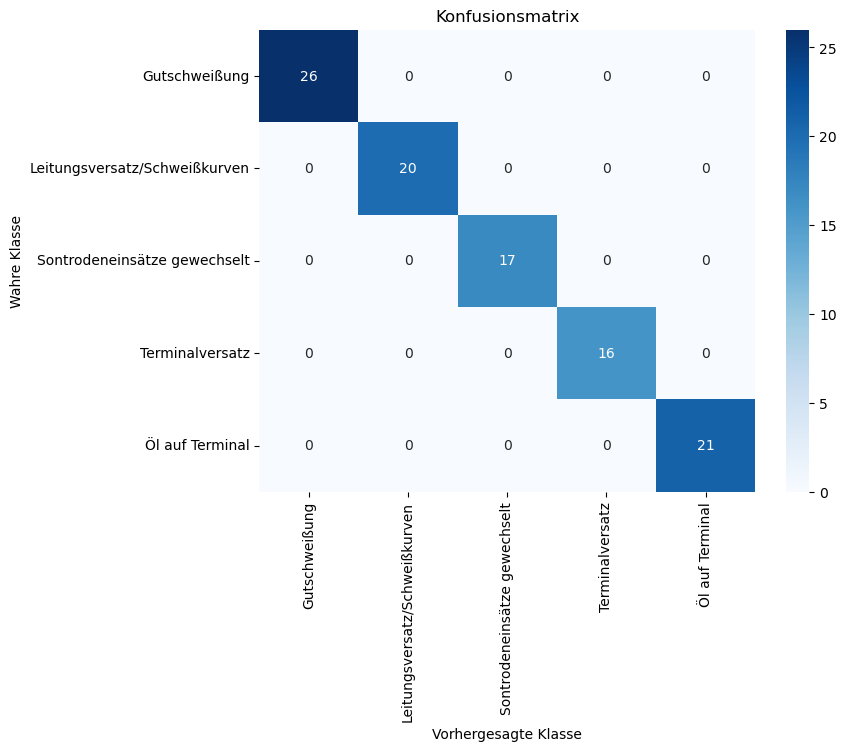

Stichprobengröße: 600
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





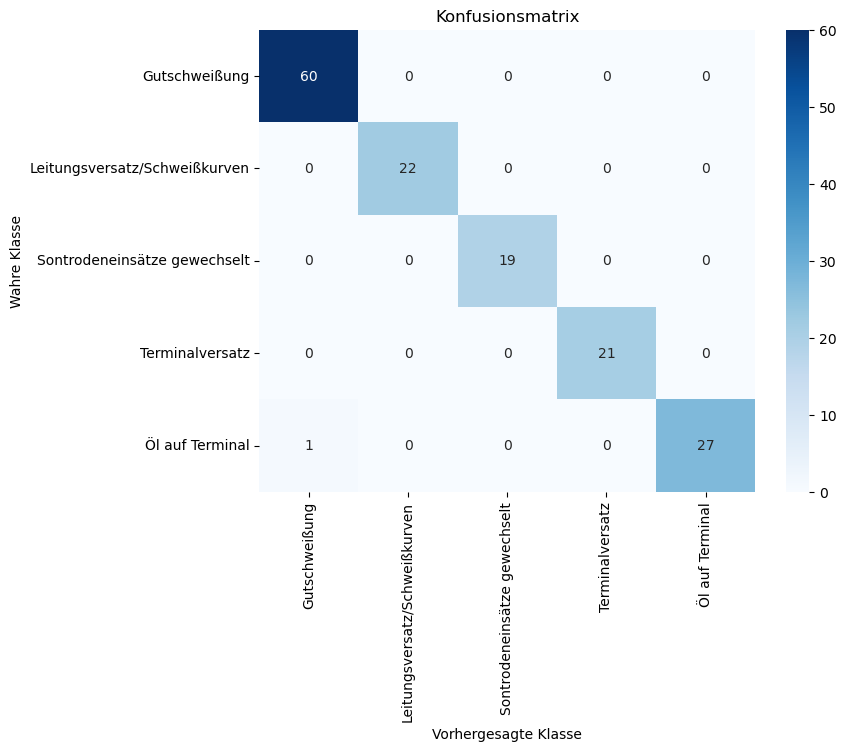

In [5]:
helper = loadAggData_subsample()
filter_c = ["P_std", "F_max", "T_sum"]


sample_size = [10, 20, 40, 60, 80, None]

for i in sample_size:

    x_train, x_test, y_train, y_test = helper.load_and_split_classification_data(
        filter_columns=filter_c, normalize=False, sample_size=i
    )

    rf = RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        n_estimators=100,
        bootstrap=True,
        random_state=42,
    )

    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f"Stichprobengröße: {600 if i is None else i*5}")
    helper.confusionmatrix(y_test, y_pred)

Stichprobengröße: 50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13





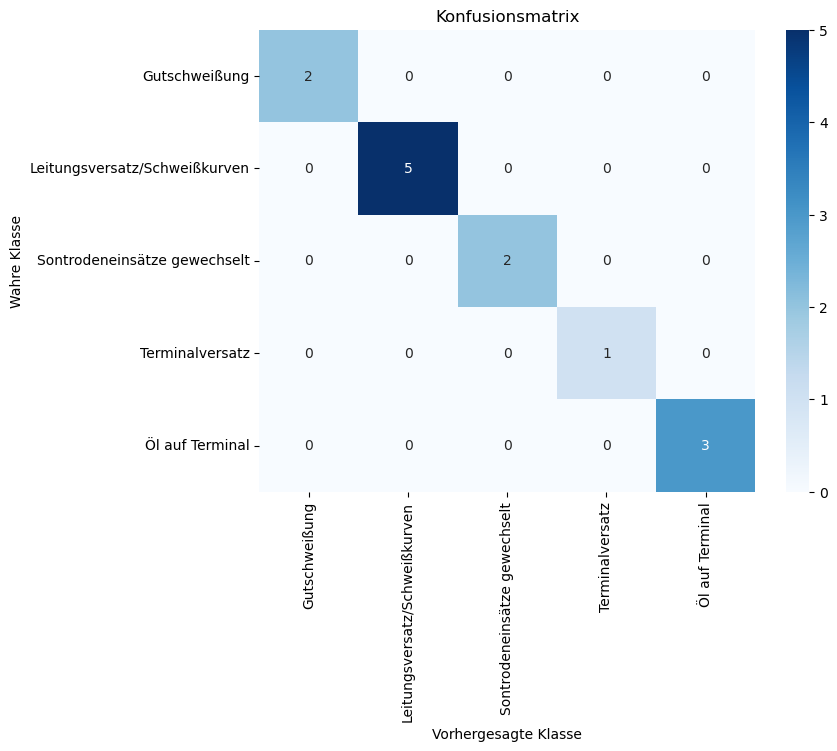

Stichprobengröße: 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25





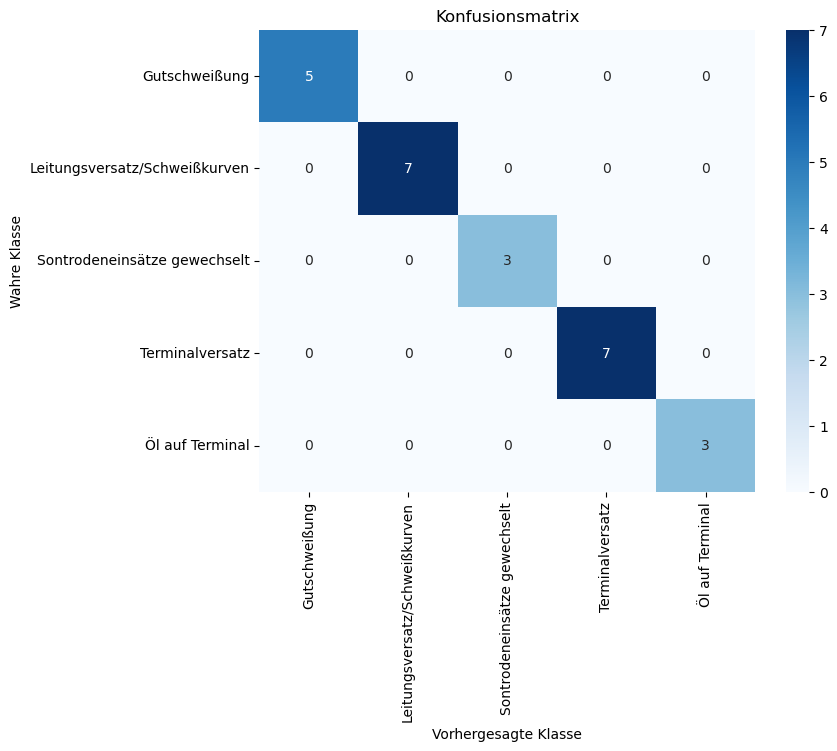

Stichprobengröße: 200
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      0.92      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50





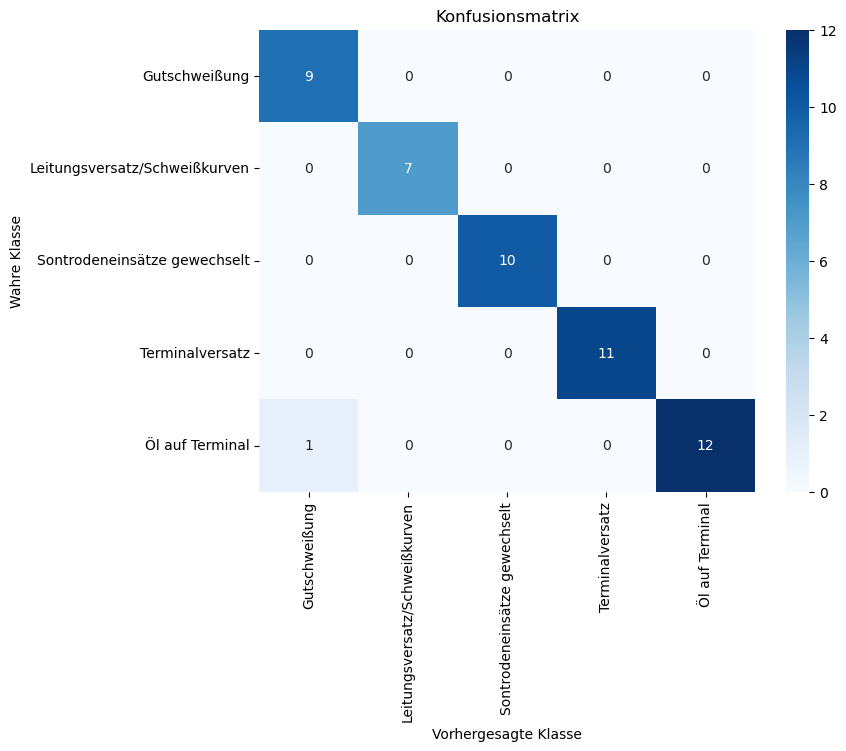

Stichprobengröße: 300
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        12
           4       1.00      0.94      0.97        17

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.98      0.97      0.97        75





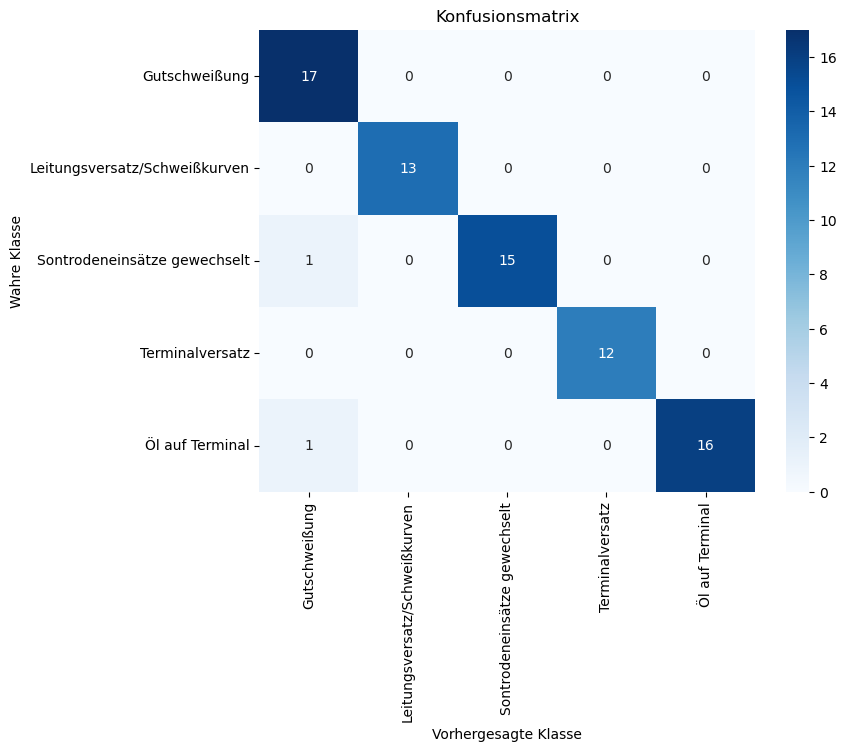

Stichprobengröße: 400
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        16

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100





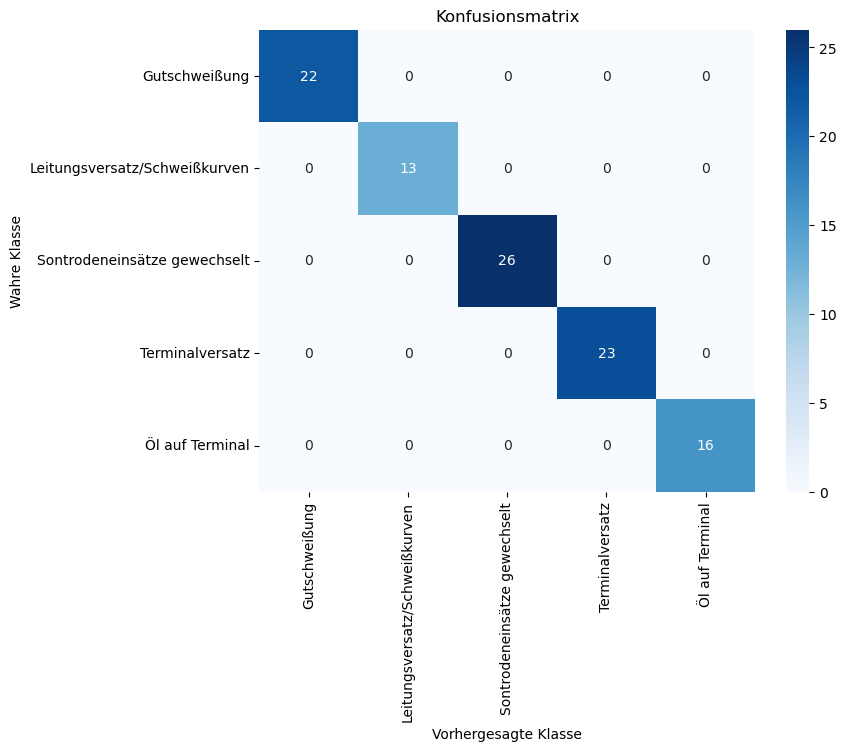

Stichprobengröße: 600
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        31
           2       0.96      1.00      0.98        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.99       150
   macro avg       0.99      1.00      0.99       150
weighted avg       0.99      0.99      0.99       150





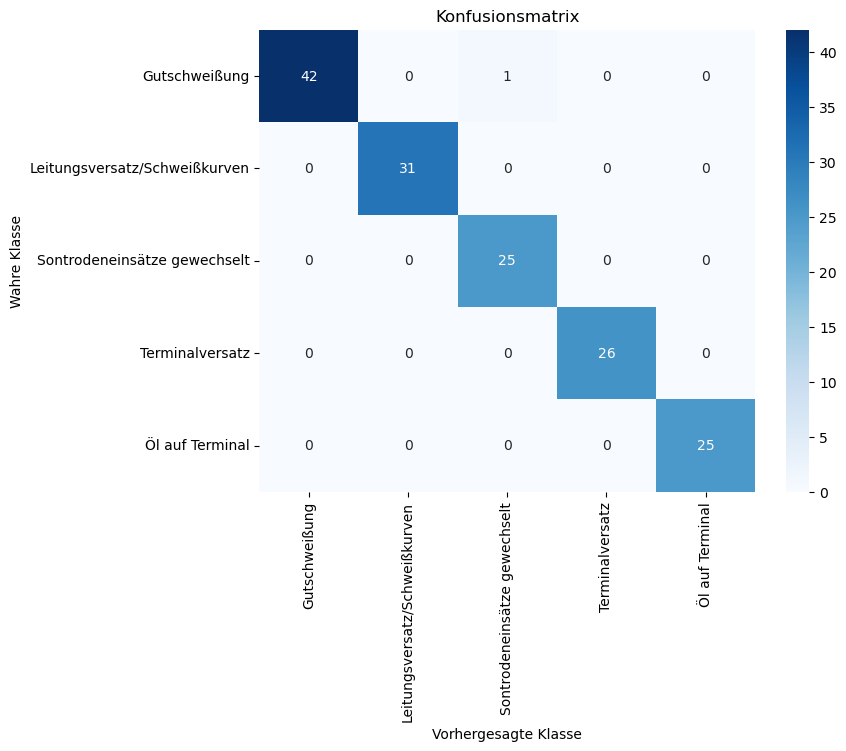

In [6]:
helper = loadAggData_subsample()
filter_c = ["P_std", "F_max", "T_sum"]


sample_size = [10, 20, 40, 60, 80, None]

for i in sample_size:

    x_train, x_test, y_train, y_test = helper.load_and_split_classification_data(
        filter_columns=filter_c, normalize=False, sample_size=i, random_state=123
    )

    rf = RandomForestClassifier(
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        n_estimators=100,
        bootstrap=True,
        random_state=42,
    )

    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f"Stichprobengröße: {600 if i is None else i*5}")
    helper.confusionmatrix(y_test, y_pred)

Die Klassifikation mittels RandomForestClassifier erweist sich als sehr gut, auch bei der Verwendung einer geringen Anzahl an Daten. 